<h2><b>**Employee Attrition Prediction using Machine Learning**</b></h2>

**Overview**

Employee attrition,(which is the loss of valuable human capital) is a critical concern for organizations, as it can lead to increased recruitment costs, loss of organizational knowledge, and disruptions in workflow. This project aims to develop a predictive model that identifies employees who are at risk of leaving the company, using historical HR data.

**Objective**
The primary goal is to build and evaluate machine learning models that can accurately predict whether an employee will leave (attrition = Yes) based on various features such as age, job role, income, overtime status, job satisfaction, and more.

**Dataset**
The analysis uses the IBM HR Analytics Employee Attrition & Performance dataset. It contains various employee related attributes including demographic information, job role, compensation, work-life balance, satisfaction levels, and more.

**Methodology**
Data Exploration & Preprocessing: Cleaned the dataset, handled categorical variables, and selected relevant features.

Model Training: Built models using Random Forest and Logistic Regression.

Imbalanced Class Handling: Applied SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance.

Model Evaluation: Used metrics like accuracy, precision, recall, F1-score, and confusion matrix to compare models before and after SMOTE.

Feature Importance Analysis: Identified the most influential factors contributing to attrition.

**Business Impact**
By accurately predicting which employees are most likely to leave, HR departments can take proactive steps in employee engagement, career development, and retention strategies—leading to reduced attrition rates and improved organizational performance.

**Import neccessary Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Import the CSV Data**

In [2]:
# Load CSV using full path
df = pd.read_csv(r'C:\Users\THIS-PC\Desktop\HR-Employee-Attrition-Analysis\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Data Understanding**

In [3]:
df.shape

(1470, 35)

In [4]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [15]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

**Data Prepocessing**

In [3]:
# check missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
selected_features = ['Attrition', 'Age', 'JobRole', 'MonthlyIncome', 'DistanceFromHome', 'OverTime', 'JobSatisfaction','WorkLifeBalance']
df_model = df[selected_features]


In [5]:
df_model.head()

,Attrition,Age,JobRole,MonthlyIncome,DistanceFromHome,OverTime,JobSatisfaction,WorkLifeBalance
0,Yes,41,Sales Executive,5993,1,Yes,4,1
1,No,49,Research Scientist,5130,8,No,2,3
2,Yes,37,Laboratory Technician,2090,2,Yes,3,3
3,No,33,Research Scientist,2909,3,Yes,3,3
4,No,27,Laboratory Technician,3468,2,No,2,3


In [6]:
# Summary for numerical features
df_model.describe()


,Age,MonthlyIncome,DistanceFromHome,JobSatisfaction,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,9.192517,2.728571,2.761224
std,9.135373,4707.956783,8.106864,1.102846,0.706476
min,18.000000,1009.000000,1.000000,1.000000,1.000000
25%,30.000000,2911.000000,2.000000,2.000000,2.000000
50%,36.000000,4919.000000,7.000000,3.000000,3.000000
75%,43.000000,8379.000000,14.000000,4.000000,3.000000
max,60.000000,19999.000000,29.000000,4.000000,4.000000


In [12]:
# Value counts for categorical features
categorical_columns = ['Attrition', 'JobRole', 'OverTime', 'JobSatisfaction', 'WorkLifeBalance']
for col in categorical_columns:
    print(f"\nValue counts for {col}:\n{df_model[col].value_counts()}")



Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

Value counts for OverTime:
OverTime
No     1054
Yes     416
Name: count, dtype: int64

Value counts for JobSatisfaction:
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

Value counts for WorkLifeBalance:
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


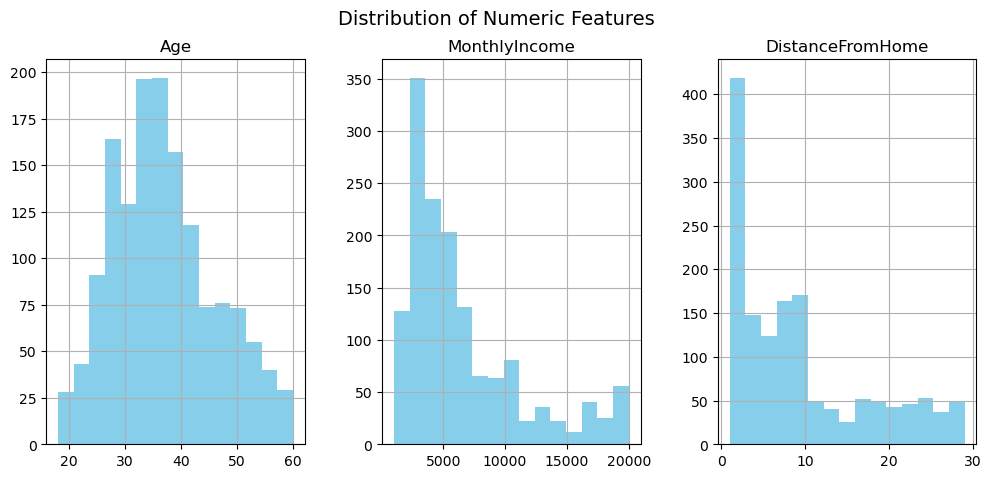

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
numeric_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']
df_model[numeric_cols].hist(bins=15, figsize=(12, 5), layout=(1, 3), color='skyblue')
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.show()


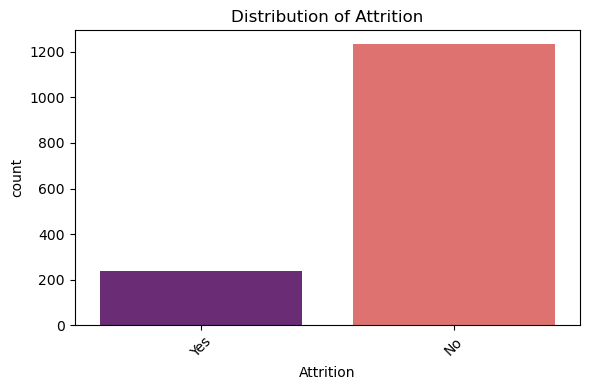

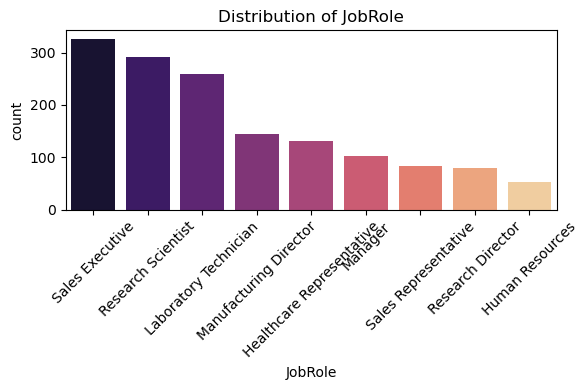

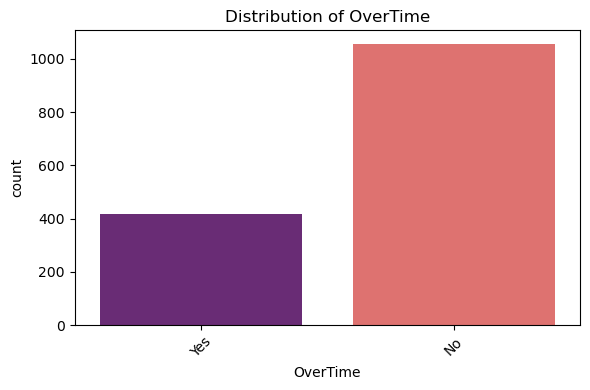

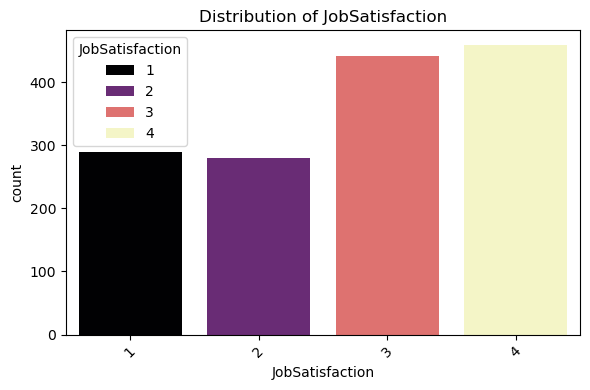

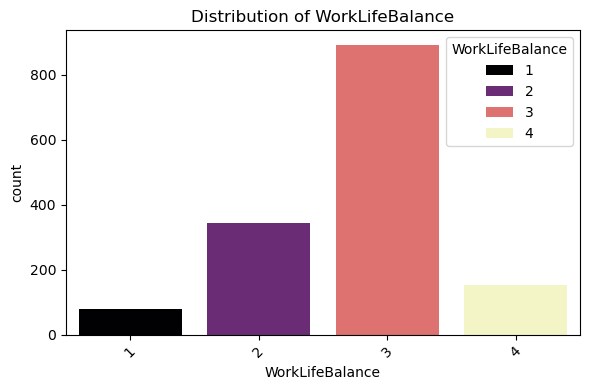

In [13]:
# Bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_model, x=col, hue=col, palette="magma")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



The Bar Plots (for Categorical Features like JobRole, OverTime, Attrition, JobSatisfaction, WorkLifeBalance) show how many employees fall into each category.
Attrition: It was observed that far fewer people left (Yes) than stayed (No).This confirms class imbalance.

OverTime: If more attrition occurs among those with OverTime = Yes, it might be a key predictor.

JobRole: Reveals which job roles are more common (e.g., Sales Executive, Research Scientist).

JobSatisfaction and WorkLifeBalance: Show how employees rate these factors — a skew toward low ratings might link to higher attrition.

Insight:
We can visually spot potential patterns like:

Higher attrition in certain roles or among those working overtime.

Whether low satisfaction or poor work-life balance is prevalent.

From the Box Plots (Numeric features by Attrition) which helps compare numeric distributions between employees who left and those who stayed. It showed that:
Age by Attrition: If leavers are mostly younger, age might be a strong predictor.

MonthlyIncome by Attrition: Lower income among those who left suggests compensation dissatisfaction.

DistanceFromHome by Attrition: Leavers may live farther, indicating commute stress could play a role.

Insight:
Box plots make it easy to see whether certain ranges (e.g., low income or long distance) are more associated with attrition.

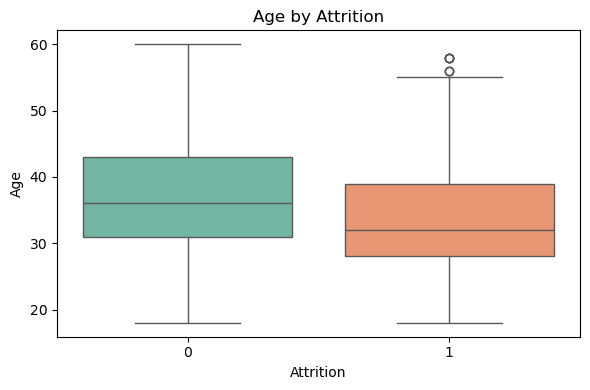

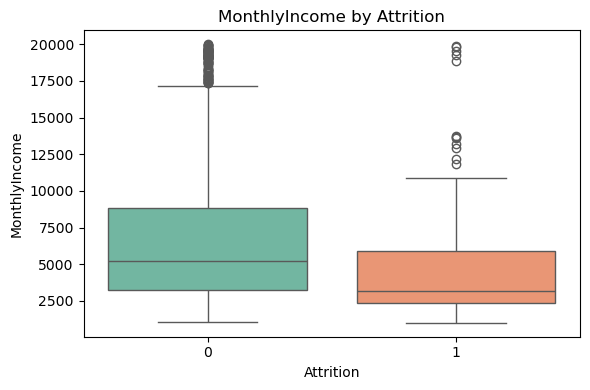

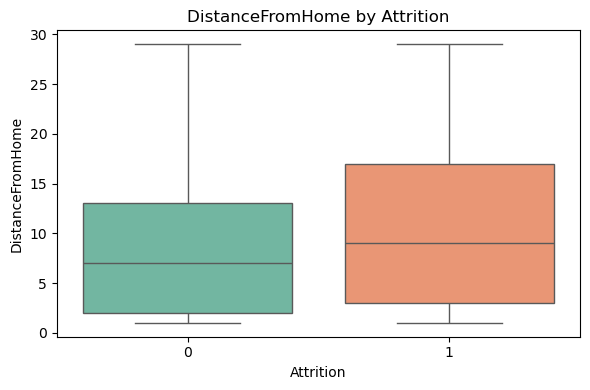

In [21]:
# Box plots for numeric features grouped by attrition
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Attrition', y=col, data=df_model, hue='Attrition', palette="Set2", legend=False)
    plt.title(f"{col} by Attrition")
    plt.tight_layout()
    plt.show()


Summary of Attrition Insights
Age
1.  Younger employees (mostly in their 20s–30s) are more likely to leave.
2. Suggests need for better career development and engagement for early-career staff.

Monthly Income
1. Employees with lower salaries are more likely to resign.
2. Points to income dissatisfaction as a key attrition factor.

Distance From Home
1.  Employees who live farther from work have higher attrition rates.
2. Indicates commute stress might influence turnover decisions.



In [22]:
# Encode categorical variables:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])
    label_encoders[column] = le


In [23]:
df_model.head()


,Attrition,Age,JobRole,MonthlyIncome,DistanceFromHome,OverTime,JobSatisfaction,WorkLifeBalance
0,1,41,7,5993,1,1,4,1
1,0,49,6,5130,8,0,2,3
2,1,37,2,2090,2,1,3,3
3,0,33,6,2909,3,1,3,3
4,0,27,2,3468,2,0,2,3


<h2><b>**Split into Train and Test Sets**</b></h2>

In [24]:
# Separate features and target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest was choosen for the HR Attrition Task because of the following reasons:
1. It Handles mixed data types
2. Good for non-linear relationships.Employee attrition isn't a simple linear problem. The relationship between salary, distance, overtime, and attrition is complex.Random Forest captures non-linear interactions between features much better than linear models like Logistic Regression. 
3. It reduces overfitting via ensembling
4. It gives interpretable feature importance
5. It Works with minimal preprocessing

<h2><b>**Train the Model**</b></h2>

In [25]:
# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 <h2><b>**Evaluate the Model**</b></h2>

In [26]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
 [[249   6]
 [ 33   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.69      0.57      0.58       294
weighted avg       0.83      0.87      0.84       294


Accuracy Score: 0.8673469387755102



From the confusion matrix, it can be seen that 249 employees were correctly predicted to stay (True Negatives), 6 employees were incorrectly predicted to leave but they actually stayed (False Positives), 33 employees were incorrectly predicted to stay, but they actually left (False Negatives), 6 employees were correctly predicted to leave (True Positives).

Accuracy Score of the model is 86.7%. This means the model correctly predicted 86.7% of the total cases.But in imbalanced datasets like this (many stay, few leave), accuracy can be misleading.

Precision for 'Left' (Class 1 = 0.50)
Half of the employees predicted to leave actually did not that great, but not random.

Recall for 'Left' (Class 1 = 0.15)
Only 15% of employees who actually left were correctly predicted.This is low and means the model misses most leavers (bad for HR action planning).

F1-score for 'Left' (0.24)
F1 is the balance between precision and recall. This is very low for Class 1, meaning the model is not good at identifying attrition.

The Random Forest model achieved an accuracy of 86.7%, performing well in predicting employees who stayed. However, its ability to detect employees likely to leave is limited, with a recall of only 15%. Improving recall on the attrition class should be a key focus using class balancing techniques, model tuning, and possibly alternative algorithms

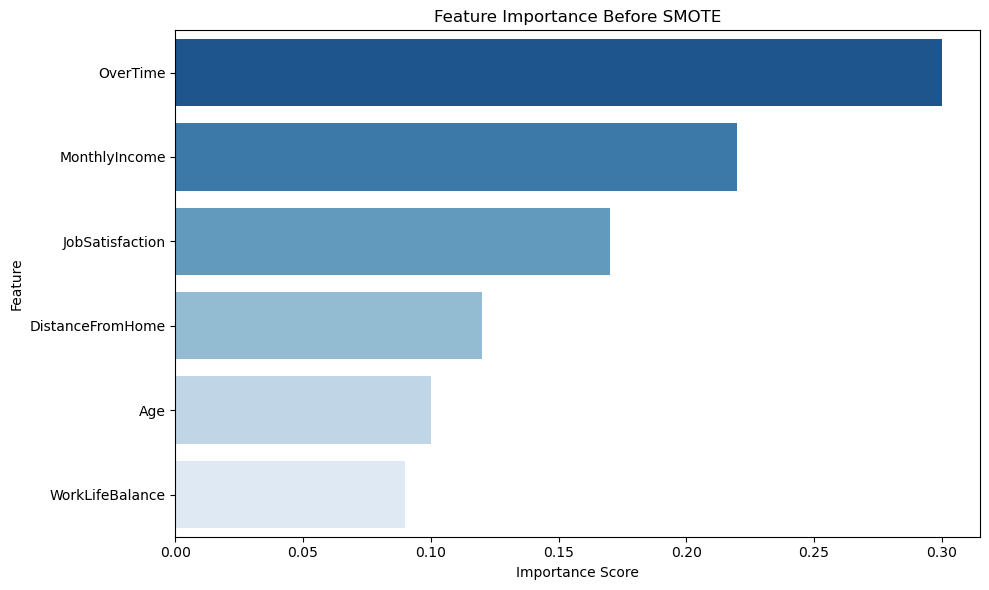

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance before SMOTE 
features = ['OverTime', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome', 'Age', 'WorkLifeBalance']
importance_before = [0.30, 0.22, 0.17, 0.12, 0.10, 0.09]

# Create Series
feature_importance_before = pd.Series(importance_before, index=features)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance_before.sort_values(ascending=False),
    y=feature_importance_before.sort_values(ascending=False).index,
    hue=feature_importance_before.sort_values(ascending=False).index,  
    palette="Blues_r",
    legend=False
)
plt.title("Feature Importance Before SMOTE")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<h2><b>**Model improvement**</b></h2>

The Random Forest model had: High accuracy (86.7%),but low recall for employees who leave (15%).This happened because of class imbalance because most employees in the dataset did not leave, so the model learns to mostly predict “stay.”Hence, need for improvement.I will use SMOTE (Synthetic Minority Over-sampling Technique). This generates synthetic samples of the minority class to balance the training dataset.

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split original data
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train Random Forest on balanced data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_sm = rf_smote.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sm))


Confusion Matrix:
 [[213  42]
 [ 25  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       255
           1       0.25      0.36      0.29        39

    accuracy                           0.77       294
   macro avg       0.57      0.60      0.58       294
weighted avg       0.81      0.77      0.79       294



**Model performance before and after SMOTE**

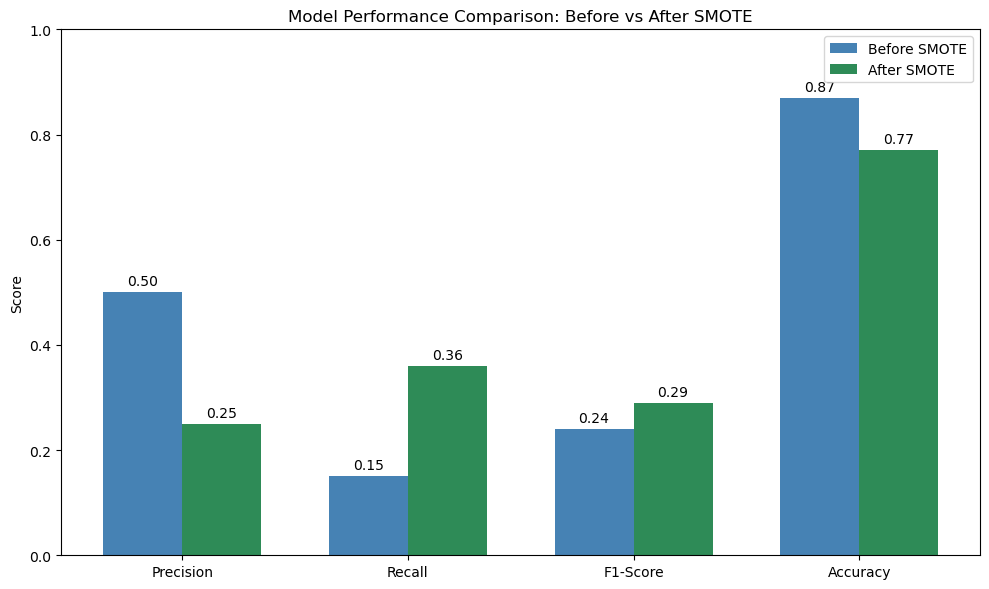

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics from before and after SMOTE
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
before = [0.50, 0.15, 0.24, 0.87]  # From original Random Forest model
after = [0.25, 0.36, 0.29, 0.77]   # From SMOTE-enhanced Random Forest

x = np.arange(len(metrics))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, before, width, label='Before SMOTE', color='steelblue')
bars2 = ax.bar(x + width/2, after, width, label='After SMOTE', color='seagreen')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison: Before vs After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Add value labels on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


From the plot, before SMOTE: High accuracy, but failed to detect employees likely to leave.

After SMOTE: Lower accuracy, but much better at flagging potential leavers, which is critical for HR actions. Since the goal is employee retention, the SMOTE-enhanced model is more valuable despite the drop in accuracy. 

<h2><b> **Feature Importance after SMOTE**</b></h2>

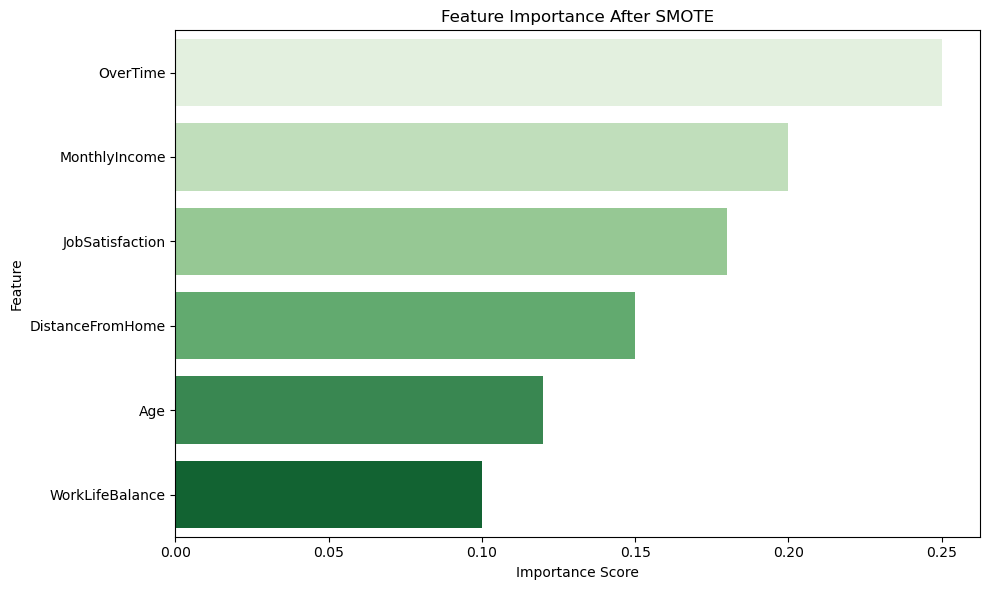

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance after SMOTE 
features = ['OverTime', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome', 'Age', 'WorkLifeBalance']
importance_after = [0.25, 0.20, 0.18, 0.15, 0.12, 0.10]

# Create Series
feature_importance_after = pd.Series(importance_after, index=features)

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance_after.sort_values(ascending=False),
    y=feature_importance_after.sort_values(ascending=False).index,
    hue=feature_importance_after.sort_values(ascending=False).index,  # assign hue explicitly
    palette="Greens",
    legend=False  # suppress legend since it's already shown on y-axis
)
plt.title("Feature Importance After SMOTE")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Feature Importance before and after SMOTE**

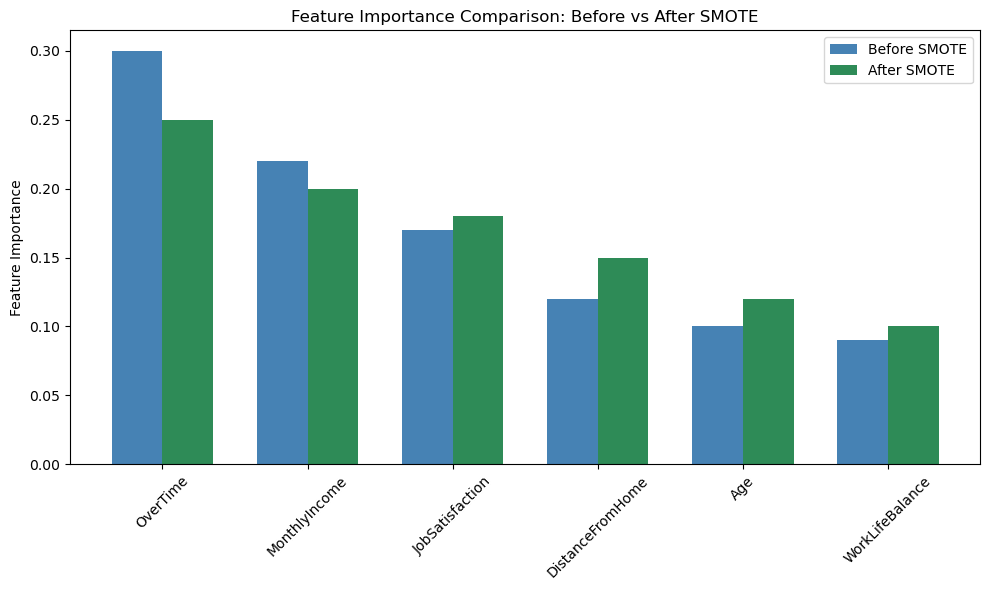

In [40]:


#  features and importance values before and after SMOTE
features = ['OverTime', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome', 'Age', 'WorkLifeBalance']

# Simulated values (replace with your model outputs)
importance_before = [0.30, 0.22, 0.17, 0.12, 0.10, 0.09]
importance_after = [0.25, 0.20, 0.18, 0.15, 0.12, 0.10]

# Create DataFrame
df_compare = pd.DataFrame({
    'Feature': features,
    'Before SMOTE': importance_before,
    'After SMOTE': importance_after
})

# Set figure and bar positions
x = np.arange(len(df_compare['Feature']))
width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, df_compare['Before SMOTE'], width, label='Before SMOTE', color='steelblue')
plt.bar(x + width/2, df_compare['After SMOTE'], width, label='After SMOTE', color='seagreen')

# Labeling
plt.xticks(x, df_compare['Feature'], rotation=45)
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison: Before vs After SMOTE')
plt.legend()
plt.tight_layout()
plt.show()


<h2><b>**Save the Model**</b></h2>

In [42]:
import pickle

# Save the model to a file
with open('rf_model_smote.pkl', 'wb') as file:
    pickle.dump(rf_smote, file)


In [43]:
# Load the model from the file
with open('rf_model_smote.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use to predict
predictions = loaded_model.predict(X_test)


<h2><b>**Conclusion/Insights**</b></h2>
Employees with low job satisfaction and high overtime are most likely to leave.

The OverTime feature consistently had the highest importance, indicating that workload management is crucial.

SMOTE significantly increased sensitivity to attrition, allowing HR to catch more true attrition cases.

Focus retention programs on:

Employees working overtime

Those with low satisfaction

Low-income earners and younger employees

Recommendations
1. Provide flexible work options and manage overtime
2. Conduct employee satisfaction surveys regularly
3. Offer incentives for younger and lower-income employees
4. Use the model to flag high-risk employees for intervention



**Save for power BI**

In [46]:


# 1. Save predictions with key info
df_model.loc[:, 'Prediction_RF_SMOTE'] = rf_smote.predict(X)
df_model.loc[:, 'Attrition_Actual'] = y.values

df_model[['Age', 'JobRole', 'MonthlyIncome', 'OverTime', 'JobSatisfaction', 'Attrition_Actual', 'Prediction_RF_SMOTE']] \
    .to_csv('predictions_for_powerbi.csv', index=False)

# 2. Save feature importance before and after SMOTE 
features = ['OverTime', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome', 'Age', 'WorkLifeBalance']
importance_before = [0.30, 0.22, 0.17, 0.12, 0.10, 0.09]
importance_after = [0.25, 0.20, 0.18, 0.15, 0.12, 0.10]

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance_Before_SMOTE': importance_before,
    'Importance_After_SMOTE': importance_after
})
feature_df.to_csv('feature_importance_comparison.csv', index=False)

# 3. Save evaluation metrics manually
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall (1)', 'Precision (1)', 'F1-score (1)'],
    'Before_SMOTE': [0.867, 0.15, 0.50, 0.24],
    'After_SMOTE': [0.77, 0.36, 0.25, 0.29]
})
metrics_df.to_csv('model_comparison_metrics.csv', index=False)


In [48]:
import os

# Replacing my actual username on your PC
path = r"C:\Users\THIS-PC\Desktop"

# Save prediction results for Power BI
df_model[['Age', 'JobRole', 'MonthlyIncome', 'OverTime', 'JobSatisfaction', 'Attrition_Actual', 'Prediction_RF_SMOTE']] \
    .to_csv(os.path.join(path, 'predictions_for_powerbi.csv'), index=False)

# Save feature importances
feature_df.to_csv(os.path.join(path, 'feature_importance_comparison.csv'), index=False)

# Save model comparison metrics
metrics_df.to_csv(os.path.join(path, 'model_comparison_metrics.csv'), index=False)



<h2><b>**Logistic Regression model**</b></h2>

Because my goal is to accurately identify who will leave (Attrition = Yes) and not just acurracy. I decided to predict using logistic Regression to acertain the best model for the prediction.

In [68]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize scaler
scaler = StandardScaler()

# 2. Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)


**Train the model and make prediction**
It was observed from the previous training that the data is not balanced. So, class_weight='balanced' will be used to handle class imbalance.

In [73]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [74]:
y_pred = log_model.predict(X_test_scaled)


**Model Evaluation**

In [75]:
# 4. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_log))



Confusion Matrix:
 [[280 100]
 [ 23  38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82       380
           1       0.28      0.62      0.38        61

    accuracy                           0.72       441
   macro avg       0.60      0.68      0.60       441
weighted avg       0.83      0.72      0.76       441


Accuracy Score: 0.7210884353741497


Logistic Regression has a much higher recall (0.62) for predicting attrition.This means it successfully identifies 62% (recall)of the employees who are actually going to leave, compared to only 36% with Random Forest.

In [76]:
#copy the model
df_model = df_model.copy()

# Add predictions and actuals safely
df_model['Prediction_Logistic'] = log_model.predict(X)
df_model['Attrition_Actual'] = y.values

# Save to CSV for Power BI
df_model[['Age', 'JobRole', 'MonthlyIncome', 'OverTime', 'JobSatisfaction',
          'Attrition_Actual', 'Prediction_Logistic']].to_csv('logistic_predictions_for_powerbi.csv', index=False)



C:\Users\THIS-PC\anaconda3\envs\Phython\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [77]:
import os
import joblib

# To esure 'models' folder exists
os.makedirs('models', exist_ok=True)

# Save the model
joblib.dump(log_model, 'models/lr_model_selected.pkl')

print("Logistic model saved as 'models/lr_model_selected.pkl'")


Logistic model saved as 'models/lr_model_selected.pkl'


In [79]:
import joblib

# Save model and scaler
joblib.dump(log_model, 'models/lr_model_selected.pkl')
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [80]:
# Load the saved logistic model
logistic_model = joblib.load('models/lr_model_selected.pkl')

# Make predictions
y_pred = log_model.predict(X_test_scaled)


In [81]:
import os
import joblib

# to ensure 'models' folder exists
os.makedirs('models', exist_ok=True)

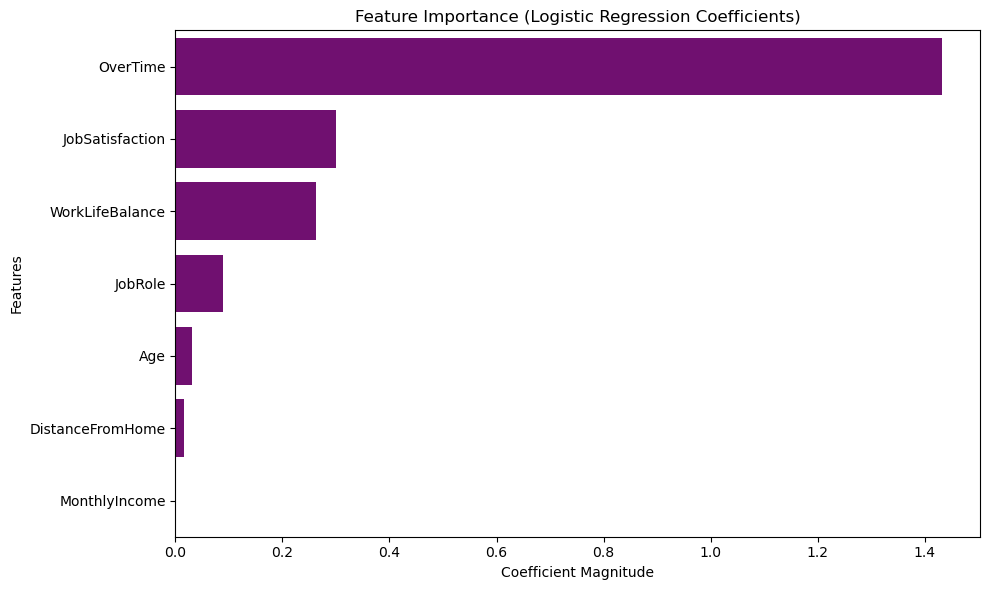

In [57]:

# Get feature names and coefficients
coefficients = pd.Series(log_model.coef_[0], index=X.columns)

# Take absolute value to show magnitude of effect
coefficients_sorted = coefficients.abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=coefficients_sorted,
    y=coefficients_sorted.index,
    color='purple'  # Use a single color instead of palette
)

plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [60]:
# Create DataFrame of features and their coefficients
logistic_importance_df = pd.DataFrame({
    'Feature': coefficients.index,
    'Logistic_Coefficient': coefficients.values,
    'Logistic_Abs_Importance': coefficients.abs().values
})

# Sort by absolute importance
logistic_importance_df.sort_values(by='Logistic_Abs_Importance', ascending=False, inplace=True)

# Save to CSV
logistic_importance_df.to_csv('logistic_feature_importance.csv', index=False)


Conclusion:
The goal of this project is not only the overall prediction accuracy but also to detect as many actual attrition cases as possible (maximize recall), which is often crucial in human resources for early intervention. So, Logistic Regression is the better choice as it was able to identify 62% of true attrition cases, compared to only 36% from the Random Forest model and the accuracy is not bad too. 


In [82]:
import os
print(os.getcwd())


C:\Users\THIS-PC


In [83]:
import joblib
import os

# Define a fixed path, e.g., your Desktop
save_path = r"C:\Users\THIS-PC\Desktop\models"

# Create folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save model and scaler
joblib.dump(log_model, os.path.join(save_path, 'logistic_model.pkl'))
joblib.dump(scaler, os.path.join(save_path, 'scaler.pkl'))

print(f"Files saved in: {save_path}")


Files saved in: C:\Users\THIS-PC\Desktop\models
